In [ ]:
from scSTADE import scSTADE
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import multiprocessing as mp

def setup_seed(seed=41):
    import torch
    import os
    import numpy as np
    import random
    torch.manual_seed(seed)  
    np.random.seed(seed)  # Numpy module.
    random.seed(seed)  # Python random module.
    if torch.cuda.is_available():
        # torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True
        torch.cuda.manual_seed(seed)  
        torch.cuda.manual_seed_all(seed) 
        #os.environ['PYTHONHASHSEED'] = str(seed)

setup_seed(41)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


n_clusters = 10  ###### the number of spatial domains.
file_path = '/home/cuiyaxuan/spatialLIBD/5.Mouse_Olfactory/' #please replace 'file_path' with the download path
adata = sc.read_h5ad(file_path + 'filtered_feature_bc_matrix.h5ad') #### project name
adata.var_names_make_unique()
model = scSTADE(adata,datatype='Slide',device=device,n_top_genes=4000)
adata = model.train()
radius = 50
tool = 'mclust' # mclust, leiden, and louvain
from utils import clustering

if tool == 'mclust':
   clustering(adata, n_clusters, radius=radius, method=tool, refinement=True)
elif tool in ['leiden', 'louvain']:
   clustering(adata, n_clusters, radius=radius, method=tool, start=0.1, end=2.0, increment=0.01, refinement=False)

adata.obs['domain']
adata.obs['domain'].to_csv("label.csv")


/home/cuiyaxuan/anaconda3/envs/pytorch/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Graph constructed!
Building sparse matrix ...
Begin to train ST data...



  0%|                                                   | 0/500 [00:00<?, ?it/s]

0



  0%|                                           | 1/500 [00:00<04:24,  1.89it/s]

0



  0%|▏                                          | 2/500 [00:00<04:01,  2.07it/s]

0



  1%|▎                                          | 3/500 [00:01<03:53,  2.13it/s]

0



  1%|▎                                          | 4/500 [00:01<03:49,  2.16it/s]

0



  1%|▍                                          | 5/500 [00:02<03:47,  2.17it/s]

0



  1%|▌                                          | 6/500 [00:02<03:46,  2.19it/s]

0



  1%|▌                                          | 7/500 [00:03<03:45,  2.19it/s]

0



  2%|▋                                          | 8/500 [00:03<03:44,  2.19it/s]

0



  2%|▊                                          | 9/500 [00:04<03:43,  2.19it/s]

0



  2%|▊                                         | 10/500 [00:04<03:42,  2.20it/s]

0



  2%|▉                                         | 11/500 [00:05<03:42,  2.20it/s]

0



  2%|█                                         | 12/500 [00:05<03:42,  2.20it/s]

0



  3%|█                                         | 13/500 [00:05<03:41,  2.20it/s]

0



  3%|█▏                                        | 14/500 [00:06<03:41,  2.19it/s]

0



  3%|█▎                                        | 15/500 [00:06<03:41,  2.19it/s]

0



  3%|█▎                                        | 16/500 [00:07<03:40,  2.19it/s]

0



  3%|█▍                                        | 17/500 [00:07<03:40,  2.19it/s]

0



  4%|█▌                                        | 18/500 [00:08<03:39,  2.19it/s]

0



  4%|█▌                                        | 19/500 [00:08<03:38,  2.20it/s]

0



  4%|█▋                                        | 20/500 [00:09<03:38,  2.20it/s]

0



  4%|█▊                                        | 21/500 [00:09<03:38,  2.20it/s]

0



  4%|█▊                                        | 22/500 [00:10<03:37,  2.19it/s]

0



  5%|█▉                                        | 23/500 [00:10<03:37,  2.19it/s]

0



  5%|██                                        | 24/500 [00:10<03:37,  2.19it/s]

0



  5%|██                                        | 25/500 [00:11<03:36,  2.19it/s]

0



  5%|██▏                                       | 26/500 [00:11<03:36,  2.19it/s]

0



  5%|██▎                                       | 27/500 [00:12<03:35,  2.19it/s]

0



  6%|██▎                                       | 28/500 [00:12<03:35,  2.19it/s]

0



  6%|██▍                                       | 29/500 [00:13<03:35,  2.19it/s]

0



  6%|██▌                                       | 30/500 [00:13<03:34,  2.19it/s]

0



  6%|██▌                                       | 31/500 [00:14<03:34,  2.18it/s]

0



  6%|██▋                                       | 32/500 [00:14<03:34,  2.19it/s]

0



  7%|██▊                                       | 33/500 [00:15<03:33,  2.19it/s]

0



  7%|██▊                                       | 34/500 [00:15<03:32,  2.19it/s]

0



  7%|██▉                                       | 35/500 [00:16<03:32,  2.18it/s]

0



  7%|███                                       | 36/500 [00:16<03:32,  2.18it/s]

0



  7%|███                                       | 37/500 [00:16<03:32,  2.18it/s]

0



  8%|███▏                                      | 38/500 [00:17<03:31,  2.18it/s]

0



  8%|███▎                                      | 39/500 [00:17<03:31,  2.18it/s]

0



  8%|███▎                                      | 40/500 [00:18<03:30,  2.19it/s]

0



  8%|███▍                                      | 41/500 [00:18<03:30,  2.18it/s]

0



  8%|███▌                                      | 42/500 [00:19<03:29,  2.18it/s]

0



  9%|███▌                                      | 43/500 [00:19<03:29,  2.18it/s]

0



  9%|███▋                                      | 44/500 [00:20<03:28,  2.19it/s]

0



  9%|███▊                                      | 45/500 [00:20<03:28,  2.18it/s]

0



  9%|███▊                                      | 46/500 [00:21<03:27,  2.18it/s]

0



  9%|███▉                                      | 47/500 [00:21<03:27,  2.19it/s]

0



 10%|████                                      | 48/500 [00:21<03:26,  2.19it/s]

0



 10%|████                                      | 49/500 [00:22<03:26,  2.18it/s]

0



 10%|████▏                                     | 50/500 [00:22<03:26,  2.18it/s]

0



 10%|████▎                                     | 51/500 [00:23<03:25,  2.19it/s]

0



 10%|████▎                                     | 52/500 [00:23<03:25,  2.18it/s]

0



 11%|████▍                                     | 53/500 [00:24<03:24,  2.18it/s]

0



 11%|████▌                                     | 54/500 [00:24<03:24,  2.18it/s]

0



 11%|████▌                                     | 55/500 [00:25<03:23,  2.19it/s]

0



 11%|████▋                                     | 56/500 [00:25<03:23,  2.19it/s]

0



 11%|████▊                                     | 57/500 [00:26<03:22,  2.19it/s]

0



 12%|████▊                                     | 58/500 [00:26<03:22,  2.18it/s]

0



 12%|████▉                                     | 59/500 [00:27<03:21,  2.18it/s]

0



 12%|█████                                     | 60/500 [00:27<03:21,  2.18it/s]

0



 12%|█████                                     | 61/500 [00:27<03:21,  2.18it/s]

0



 12%|█████▏                                    | 62/500 [00:28<03:20,  2.18it/s]

0



 13%|█████▎                                    | 63/500 [00:28<03:20,  2.18it/s]

0



 13%|█████▍                                    | 64/500 [00:29<03:19,  2.18it/s]

0



 13%|█████▍                                    | 65/500 [00:29<03:19,  2.18it/s]

0



 13%|█████▌                                    | 66/500 [00:30<03:18,  2.18it/s]

0



 13%|█████▋                                    | 67/500 [00:30<03:18,  2.18it/s]

0



 14%|█████▋                                    | 68/500 [00:31<03:17,  2.18it/s]

0



 14%|█████▊                                    | 69/500 [00:31<03:17,  2.19it/s]

0



 14%|█████▉                                    | 70/500 [00:32<03:16,  2.19it/s]

0



 14%|█████▉                                    | 71/500 [00:32<03:16,  2.18it/s]

0



 14%|██████                                    | 72/500 [00:32<03:16,  2.18it/s]

0



 15%|██████▏                                   | 73/500 [00:33<03:15,  2.18it/s]

0



 15%|██████▏                                   | 74/500 [00:33<03:15,  2.18it/s]

0



 15%|██████▎                                   | 75/500 [00:34<03:14,  2.18it/s]

0



 15%|██████▍                                   | 76/500 [00:34<03:14,  2.18it/s]

0



 15%|██████▍                                   | 77/500 [00:35<03:13,  2.18it/s]

0



 16%|██████▌                                   | 78/500 [00:35<03:13,  2.18it/s]

0



 16%|██████▋                                   | 79/500 [00:36<03:13,  2.18it/s]

0



 16%|██████▋                                   | 80/500 [00:36<03:12,  2.18it/s]

0



 16%|██████▊                                   | 81/500 [00:37<03:12,  2.18it/s]

0



 16%|██████▉                                   | 82/500 [00:37<03:11,  2.18it/s]

0



 17%|██████▉                                   | 83/500 [00:38<03:11,  2.18it/s]

0



 17%|███████                                   | 84/500 [00:38<03:10,  2.18it/s]

0



 17%|███████▏                                  | 85/500 [00:38<03:10,  2.18it/s]

0



 17%|███████▏                                  | 86/500 [00:39<03:09,  2.18it/s]

0



 17%|███████▎                                  | 87/500 [00:39<03:09,  2.18it/s]

0



 18%|███████▍                                  | 88/500 [00:40<03:08,  2.18it/s]

0



 18%|███████▍                                  | 89/500 [00:40<03:08,  2.18it/s]

0



 18%|███████▌                                  | 90/500 [00:41<03:08,  2.18it/s]

0



 18%|███████▋                                  | 91/500 [00:41<03:08,  2.17it/s]

0



 18%|███████▋                                  | 92/500 [00:42<03:07,  2.18it/s]

0



 19%|███████▊                                  | 93/500 [00:42<03:06,  2.18it/s]

0



 19%|███████▉                                  | 94/500 [00:43<03:06,  2.18it/s]

0



 19%|███████▉                                  | 95/500 [00:43<03:05,  2.18it/s]

0



 19%|████████                                  | 96/500 [00:43<03:05,  2.18it/s]

0



 19%|████████▏                                 | 97/500 [00:44<03:04,  2.18it/s]

0



 20%|████████▏                                 | 98/500 [00:44<03:04,  2.18it/s]

0



 20%|████████▎                                 | 99/500 [00:45<03:03,  2.18it/s]

0



 20%|████████▏                                | 100/500 [00:45<03:03,  2.18it/s]

0



 20%|████████▎                                | 101/500 [00:46<03:03,  2.18it/s]

0



 20%|████████▎                                | 102/500 [00:46<03:02,  2.18it/s]

0



 21%|████████▍                                | 103/500 [00:47<03:02,  2.18it/s]

0



 21%|████████▌                                | 104/500 [00:47<03:02,  2.18it/s]

0



 21%|████████▌                                | 105/500 [00:48<03:01,  2.18it/s]

0



 21%|████████▋                                | 106/500 [00:48<03:00,  2.18it/s]

0



 21%|████████▊                                | 107/500 [00:49<03:00,  2.18it/s]

0



 22%|████████▊                                | 108/500 [00:49<02:59,  2.18it/s]

0



 22%|████████▉                                | 109/500 [00:49<02:59,  2.18it/s]

0



 22%|█████████                                | 110/500 [00:50<02:58,  2.18it/s]

0



 22%|█████████                                | 111/500 [00:50<02:58,  2.18it/s]

0



 22%|█████████▏                               | 112/500 [00:51<02:57,  2.18it/s]

0



 23%|█████████▎                               | 113/500 [00:51<02:57,  2.18it/s]

0



 23%|█████████▎                               | 114/500 [00:52<02:56,  2.18it/s]

0



 23%|█████████▍                               | 115/500 [00:52<02:56,  2.18it/s]

0



 23%|█████████▌                               | 116/500 [00:53<02:56,  2.18it/s]

0



 23%|█████████▌                               | 117/500 [00:53<02:55,  2.18it/s]

0



 24%|█████████▋                               | 118/500 [00:54<02:55,  2.18it/s]

0



 24%|█████████▊                               | 119/500 [00:54<02:54,  2.18it/s]

0



 24%|█████████▊                               | 120/500 [00:54<02:54,  2.18it/s]

0



 24%|█████████▉                               | 121/500 [00:55<02:53,  2.18it/s]

0



 24%|██████████                               | 122/500 [00:55<02:53,  2.18it/s]

0



 25%|██████████                               | 123/500 [00:56<02:52,  2.18it/s]

0



 25%|██████████▏                              | 124/500 [00:56<02:52,  2.18it/s]

0



 25%|██████████▎                              | 125/500 [00:57<02:51,  2.18it/s]

0



 25%|██████████▎                              | 126/500 [00:57<02:51,  2.18it/s]

0



 25%|██████████▍                              | 127/500 [00:58<02:51,  2.18it/s]

0



 26%|██████████▍                              | 128/500 [00:58<02:50,  2.18it/s]

0



 26%|██████████▌                              | 129/500 [00:59<02:50,  2.17it/s]

0



 26%|██████████▋                              | 130/500 [00:59<02:50,  2.17it/s]

0



 26%|██████████▋                              | 131/500 [01:00<02:49,  2.17it/s]

0



 26%|██████████▊                              | 132/500 [01:00<02:49,  2.18it/s]

0



 27%|██████████▉                              | 133/500 [01:00<02:48,  2.17it/s]

0



 27%|██████████▉                              | 134/500 [01:01<02:48,  2.17it/s]

0



 27%|███████████                              | 135/500 [01:01<02:47,  2.18it/s]

0



 27%|███████████▏                             | 136/500 [01:02<02:47,  2.18it/s]

0



 27%|███████████▏                             | 137/500 [01:02<02:46,  2.18it/s]

0



 28%|███████████▎                             | 138/500 [01:03<02:46,  2.18it/s]

0



 28%|███████████▍                             | 139/500 [01:03<02:45,  2.18it/s]

0



 28%|███████████▍                             | 140/500 [01:04<02:45,  2.18it/s]

0



 28%|███████████▌                             | 141/500 [01:04<02:44,  2.18it/s]

0



 28%|███████████▋                             | 142/500 [01:05<02:44,  2.18it/s]

0



 29%|███████████▋                             | 143/500 [01:05<02:43,  2.18it/s]

0



 29%|███████████▊                             | 144/500 [01:06<02:43,  2.18it/s]

0



 29%|███████████▉                             | 145/500 [01:06<02:43,  2.17it/s]

0



 29%|███████████▉                             | 146/500 [01:06<02:42,  2.18it/s]

0



 29%|████████████                             | 147/500 [01:07<02:42,  2.18it/s]

0



 30%|████████████▏                            | 148/500 [01:07<02:41,  2.17it/s]

0



 30%|████████████▏                            | 149/500 [01:08<02:41,  2.18it/s]

0



 30%|████████████▎                            | 150/500 [01:08<02:40,  2.18it/s]

0



 30%|████████████▍                            | 151/500 [01:09<02:40,  2.18it/s]

0



 30%|████████████▍                            | 152/500 [01:09<02:39,  2.18it/s]

0



 31%|████████████▌                            | 153/500 [01:10<02:39,  2.18it/s]

0



 31%|████████████▋                            | 154/500 [01:10<02:39,  2.18it/s]

0



 31%|████████████▋                            | 155/500 [01:11<02:38,  2.18it/s]

0



 31%|████████████▊                            | 156/500 [01:11<02:37,  2.18it/s]

0



 31%|████████████▊                            | 157/500 [01:11<02:37,  2.18it/s]

0



 32%|████████████▉                            | 158/500 [01:12<02:37,  2.18it/s]

0



 32%|█████████████                            | 159/500 [01:12<02:36,  2.18it/s]

0



 32%|█████████████                            | 160/500 [01:13<02:36,  2.18it/s]

0



 32%|█████████████▏                           | 161/500 [01:13<02:35,  2.18it/s]

0



 32%|█████████████▎                           | 162/500 [01:14<02:35,  2.18it/s]

0



 33%|█████████████▎                           | 163/500 [01:14<02:34,  2.18it/s]

0



 33%|█████████████▍                           | 164/500 [01:15<02:34,  2.18it/s]

0



 33%|█████████████▌                           | 165/500 [01:15<02:34,  2.17it/s]

0



 33%|█████████████▌                           | 166/500 [01:16<02:33,  2.17it/s]

0



 33%|█████████████▋                           | 167/500 [01:16<02:33,  2.17it/s]

0



 34%|█████████████▊                           | 168/500 [01:17<02:32,  2.17it/s]

0



 34%|█████████████▊                           | 169/500 [01:17<02:32,  2.17it/s]

0



 34%|█████████████▉                           | 170/500 [01:17<02:31,  2.17it/s]

0



 34%|██████████████                           | 171/500 [01:18<02:31,  2.18it/s]

0



 34%|██████████████                           | 172/500 [01:18<02:30,  2.17it/s]

0



 35%|██████████████▏                          | 173/500 [01:19<02:30,  2.17it/s]

0



 35%|██████████████▎                          | 174/500 [01:19<02:30,  2.17it/s]

0



 35%|██████████████▎                          | 175/500 [01:20<02:29,  2.17it/s]

0



 35%|██████████████▍                          | 176/500 [01:20<02:29,  2.17it/s]

0



 35%|██████████████▌                          | 177/500 [01:21<02:28,  2.18it/s]

0



 36%|██████████████▌                          | 178/500 [01:21<02:27,  2.18it/s]

0



 36%|██████████████▋                          | 179/500 [01:22<02:27,  2.17it/s]

0



 36%|██████████████▊                          | 180/500 [01:22<02:27,  2.17it/s]

0



 36%|██████████████▊                          | 181/500 [01:23<02:26,  2.18it/s]

0



 36%|██████████████▉                          | 182/500 [01:23<02:26,  2.18it/s]

0



 37%|███████████████                          | 183/500 [01:23<02:25,  2.18it/s]

0



 37%|███████████████                          | 184/500 [01:24<02:25,  2.18it/s]

0



 37%|███████████████▏                         | 185/500 [01:24<02:24,  2.18it/s]

0



 37%|███████████████▎                         | 186/500 [01:25<02:24,  2.18it/s]

0



 37%|███████████████▎                         | 187/500 [01:25<02:23,  2.18it/s]

0



 38%|███████████████▍                         | 188/500 [01:26<02:23,  2.18it/s]

0



 38%|███████████████▍                         | 189/500 [01:26<02:22,  2.18it/s]

0



 38%|███████████████▌                         | 190/500 [01:27<02:22,  2.18it/s]

0



 38%|███████████████▋                         | 191/500 [01:27<02:21,  2.18it/s]

0



 38%|███████████████▋                         | 192/500 [01:28<02:21,  2.17it/s]

0



 39%|███████████████▊                         | 193/500 [01:28<02:21,  2.17it/s]

0



 39%|███████████████▉                         | 194/500 [01:29<02:20,  2.17it/s]

0



 39%|███████████████▉                         | 195/500 [01:29<02:20,  2.17it/s]

0



 39%|████████████████                         | 196/500 [01:29<02:20,  2.17it/s]

0



 39%|████████████████▏                        | 197/500 [01:30<02:19,  2.17it/s]

0



 40%|████████████████▏                        | 198/500 [01:30<02:18,  2.18it/s]

0



 40%|████████████████▎                        | 199/500 [01:31<02:18,  2.17it/s]

0



 40%|████████████████▍                        | 200/500 [01:31<02:18,  2.17it/s]

0



 40%|████████████████▍                        | 201/500 [01:32<02:17,  2.17it/s]

0



 40%|████████████████▌                        | 202/500 [01:32<02:17,  2.17it/s]

0



 41%|████████████████▋                        | 203/500 [01:33<02:16,  2.17it/s]

0



 41%|████████████████▋                        | 204/500 [01:33<02:16,  2.18it/s]

0



 41%|████████████████▊                        | 205/500 [01:34<02:15,  2.17it/s]

0



 41%|████████████████▉                        | 206/500 [01:34<02:15,  2.17it/s]

0



 41%|████████████████▉                        | 207/500 [01:34<02:14,  2.17it/s]

0



 42%|█████████████████                        | 208/500 [01:35<02:14,  2.17it/s]

0



 42%|█████████████████▏                       | 209/500 [01:35<02:13,  2.17it/s]

0



 42%|█████████████████▏                       | 210/500 [01:36<02:13,  2.18it/s]

0



 42%|█████████████████▎                       | 211/500 [01:36<02:13,  2.17it/s]

0



 42%|█████████████████▍                       | 212/500 [01:37<02:12,  2.17it/s]

0



 43%|█████████████████▍                       | 213/500 [01:37<02:12,  2.17it/s]

0



 43%|█████████████████▌                       | 214/500 [01:38<02:11,  2.18it/s]

0



 43%|█████████████████▋                       | 215/500 [01:38<02:11,  2.17it/s]

0



 43%|█████████████████▋                       | 216/500 [01:39<02:10,  2.17it/s]

0



 43%|█████████████████▊                       | 217/500 [01:39<02:10,  2.17it/s]

0



 44%|█████████████████▉                       | 218/500 [01:40<02:09,  2.17it/s]

0



 44%|█████████████████▉                       | 219/500 [01:40<02:09,  2.17it/s]

0



 44%|██████████████████                       | 220/500 [01:40<02:08,  2.17it/s]

0



 44%|██████████████████                       | 221/500 [01:41<02:08,  2.17it/s]

0



 44%|██████████████████▏                      | 222/500 [01:41<02:07,  2.18it/s]

0



 45%|██████████████████▎                      | 223/500 [01:42<02:07,  2.17it/s]

0



 45%|██████████████████▎                      | 224/500 [01:42<02:06,  2.17it/s]

0



 45%|██████████████████▍                      | 225/500 [01:43<02:06,  2.18it/s]

0



 45%|██████████████████▌                      | 226/500 [01:43<02:05,  2.18it/s]

0



 45%|██████████████████▌                      | 227/500 [01:44<02:05,  2.17it/s]

0



 46%|██████████████████▋                      | 228/500 [01:44<02:05,  2.18it/s]

0



 46%|██████████████████▊                      | 229/500 [01:45<02:04,  2.18it/s]

0



 46%|██████████████████▊                      | 230/500 [01:45<02:03,  2.18it/s]

0



 46%|██████████████████▉                      | 231/500 [01:46<02:03,  2.17it/s]

0



 46%|███████████████████                      | 232/500 [01:46<02:03,  2.17it/s]

0



 47%|███████████████████                      | 233/500 [01:46<02:02,  2.18it/s]

0



 47%|███████████████████▏                     | 234/500 [01:47<02:02,  2.18it/s]

0



 47%|███████████████████▎                     | 235/500 [01:47<02:01,  2.17it/s]

0



 47%|███████████████████▎                     | 236/500 [01:48<02:01,  2.17it/s]

0



 47%|███████████████████▍                     | 237/500 [01:48<02:00,  2.18it/s]

0



 48%|███████████████████▌                     | 238/500 [01:49<02:00,  2.17it/s]

0



 48%|███████████████████▌                     | 239/500 [01:49<02:00,  2.17it/s]

0



 48%|███████████████████▋                     | 240/500 [01:50<01:59,  2.17it/s]

0



 48%|███████████████████▊                     | 241/500 [01:50<01:59,  2.17it/s]

0



 48%|███████████████████▊                     | 242/500 [01:51<01:58,  2.17it/s]

0



 49%|███████████████████▉                     | 243/500 [01:51<01:58,  2.17it/s]

0



 49%|████████████████████                     | 244/500 [01:52<01:57,  2.17it/s]

0



 49%|████████████████████                     | 245/500 [01:52<01:57,  2.17it/s]

0



 49%|████████████████████▏                    | 246/500 [01:52<01:56,  2.17it/s]

0



 49%|████████████████████▎                    | 247/500 [01:53<01:56,  2.17it/s]

0



 50%|████████████████████▎                    | 248/500 [01:53<01:55,  2.17it/s]

0



 50%|████████████████████▍                    | 249/500 [01:54<01:55,  2.17it/s]

0



 50%|████████████████████▌                    | 250/500 [01:54<01:55,  2.17it/s]

0



 50%|████████████████████▌                    | 251/500 [01:55<01:54,  2.17it/s]

0



 50%|████████████████████▋                    | 252/500 [01:55<01:54,  2.17it/s]

0



 51%|████████████████████▋                    | 253/500 [01:56<01:53,  2.18it/s]

0



 51%|████████████████████▊                    | 254/500 [01:56<01:53,  2.17it/s]

0



 51%|████████████████████▉                    | 255/500 [01:57<01:52,  2.17it/s]

0



 51%|████████████████████▉                    | 256/500 [01:57<01:52,  2.17it/s]

0



 51%|█████████████████████                    | 257/500 [01:57<01:51,  2.17it/s]

0



 52%|█████████████████████▏                   | 258/500 [01:58<01:51,  2.17it/s]

0



 52%|█████████████████████▏                   | 259/500 [01:58<01:50,  2.17it/s]

0



 52%|█████████████████████▎                   | 260/500 [01:59<01:50,  2.17it/s]

0



 52%|█████████████████████▍                   | 261/500 [01:59<01:49,  2.17it/s]

0



 52%|█████████████████████▍                   | 262/500 [02:00<01:49,  2.17it/s]

0



 53%|█████████████████████▌                   | 263/500 [02:00<01:49,  2.17it/s]

0



 53%|█████████████████████▋                   | 264/500 [02:01<01:48,  2.17it/s]

0



 53%|█████████████████████▋                   | 265/500 [02:01<01:48,  2.17it/s]

0



 53%|█████████████████████▊                   | 266/500 [02:02<01:47,  2.17it/s]

0



 53%|█████████████████████▉                   | 267/500 [02:02<01:47,  2.17it/s]

0



 54%|█████████████████████▉                   | 268/500 [02:03<01:46,  2.17it/s]

0



 54%|██████████████████████                   | 269/500 [02:03<01:46,  2.17it/s]

0



 54%|██████████████████████▏                  | 270/500 [02:03<01:46,  2.17it/s]

0



 54%|██████████████████████▏                  | 271/500 [02:04<01:45,  2.17it/s]

0



 54%|██████████████████████▎                  | 272/500 [02:04<01:45,  2.17it/s]

0



 55%|██████████████████████▍                  | 273/500 [02:05<01:44,  2.17it/s]

0



 55%|██████████████████████▍                  | 274/500 [02:05<01:44,  2.17it/s]

0



 55%|██████████████████████▌                  | 275/500 [02:06<01:43,  2.17it/s]

0



 55%|██████████████████████▋                  | 276/500 [02:06<01:43,  2.17it/s]

0



 55%|██████████████████████▋                  | 277/500 [02:07<01:42,  2.17it/s]

0



 56%|██████████████████████▊                  | 278/500 [02:07<01:42,  2.17it/s]

0



 56%|██████████████████████▉                  | 279/500 [02:08<01:41,  2.17it/s]

0



 56%|██████████████████████▉                  | 280/500 [02:08<01:41,  2.17it/s]

0



 56%|███████████████████████                  | 281/500 [02:09<01:40,  2.17it/s]

0



 56%|███████████████████████                  | 282/500 [02:09<01:40,  2.17it/s]

0



 57%|███████████████████████▏                 | 283/500 [02:09<01:40,  2.17it/s]

0



 57%|███████████████████████▎                 | 284/500 [02:10<01:39,  2.17it/s]

0



 57%|███████████████████████▎                 | 285/500 [02:10<01:38,  2.17it/s]

0



 57%|███████████████████████▍                 | 286/500 [02:11<01:38,  2.17it/s]

0



 57%|███████████████████████▌                 | 287/500 [02:11<01:38,  2.17it/s]

0



 58%|███████████████████████▌                 | 288/500 [02:12<01:37,  2.17it/s]

0



 58%|███████████████████████▋                 | 289/500 [02:12<01:36,  2.18it/s]

0



 58%|███████████████████████▊                 | 290/500 [02:13<01:36,  2.17it/s]

0



 58%|███████████████████████▊                 | 291/500 [02:13<01:36,  2.17it/s]

0



 58%|███████████████████████▉                 | 292/500 [02:14<01:35,  2.17it/s]

0



 59%|████████████████████████                 | 293/500 [02:14<01:35,  2.17it/s]

0



 59%|████████████████████████                 | 294/500 [02:15<01:34,  2.17it/s]

0



 59%|████████████████████████▏                | 295/500 [02:15<01:34,  2.17it/s]

0



 59%|████████████████████████▎                | 296/500 [02:15<01:33,  2.17it/s]

0



 59%|████████████████████████▎                | 297/500 [02:16<01:33,  2.17it/s]

0



 60%|████████████████████████▍                | 298/500 [02:16<01:33,  2.17it/s]

0



 60%|████████████████████████▌                | 299/500 [02:17<01:32,  2.17it/s]

0



 60%|████████████████████████▌                | 300/500 [02:17<01:32,  2.17it/s]

0



 60%|████████████████████████▋                | 301/500 [02:18<01:31,  2.17it/s]

0



 60%|████████████████████████▊                | 302/500 [02:18<01:31,  2.17it/s]

0



 61%|████████████████████████▊                | 303/500 [02:19<01:30,  2.17it/s]

0



 61%|████████████████████████▉                | 304/500 [02:19<01:30,  2.17it/s]

0



 61%|█████████████████████████                | 305/500 [02:20<01:29,  2.17it/s]

0



 61%|█████████████████████████                | 306/500 [02:20<01:29,  2.17it/s]

0



 61%|█████████████████████████▏               | 307/500 [02:21<01:29,  2.17it/s]

0



 62%|█████████████████████████▎               | 308/500 [02:21<01:28,  2.17it/s]

0



 62%|█████████████████████████▎               | 309/500 [02:21<01:27,  2.17it/s]

0



 62%|█████████████████████████▍               | 310/500 [02:22<01:27,  2.17it/s]

0



 62%|█████████████████████████▌               | 311/500 [02:22<01:27,  2.17it/s]

0



 62%|█████████████████████████▌               | 312/500 [02:23<01:26,  2.17it/s]

0



 63%|█████████████████████████▋               | 313/500 [02:23<01:26,  2.17it/s]

0



 63%|█████████████████████████▋               | 314/500 [02:24<01:25,  2.17it/s]

0



 63%|█████████████████████████▊               | 315/500 [02:24<01:25,  2.17it/s]

0



 63%|█████████████████████████▉               | 316/500 [02:25<01:24,  2.17it/s]

0



 63%|█████████████████████████▉               | 317/500 [02:25<01:24,  2.17it/s]

0



 64%|██████████████████████████               | 318/500 [02:26<01:23,  2.17it/s]

0



 64%|██████████████████████████▏              | 319/500 [02:26<01:23,  2.17it/s]

0



 64%|██████████████████████████▏              | 320/500 [02:27<01:22,  2.17it/s]

0



 64%|██████████████████████████▎              | 321/500 [02:27<01:22,  2.17it/s]

0



 64%|██████████████████████████▍              | 322/500 [02:27<01:21,  2.17it/s]

0



 65%|██████████████████████████▍              | 323/500 [02:28<01:21,  2.17it/s]

0



 65%|██████████████████████████▌              | 324/500 [02:28<01:21,  2.17it/s]

0



 65%|██████████████████████████▋              | 325/500 [02:29<01:20,  2.17it/s]

0



 65%|██████████████████████████▋              | 326/500 [02:29<01:20,  2.17it/s]

0



 65%|██████████████████████████▊              | 327/500 [02:30<01:19,  2.17it/s]

0



 66%|██████████████████████████▉              | 328/500 [02:30<01:19,  2.17it/s]

0



 66%|██████████████████████████▉              | 329/500 [02:31<01:18,  2.17it/s]

0



 66%|███████████████████████████              | 330/500 [02:31<01:18,  2.17it/s]

0



 66%|███████████████████████████▏             | 331/500 [02:32<01:17,  2.17it/s]

0



 66%|███████████████████████████▏             | 332/500 [02:32<01:17,  2.17it/s]

0



 67%|███████████████████████████▎             | 333/500 [02:32<01:16,  2.17it/s]

0



 67%|███████████████████████████▍             | 334/500 [02:33<01:16,  2.17it/s]

0



 67%|███████████████████████████▍             | 335/500 [02:33<01:16,  2.17it/s]

0



 67%|███████████████████████████▌             | 336/500 [02:34<01:15,  2.17it/s]

0



 67%|███████████████████████████▋             | 337/500 [02:34<01:15,  2.17it/s]

0



 68%|███████████████████████████▋             | 338/500 [02:35<01:14,  2.17it/s]

0



 68%|███████████████████████████▊             | 339/500 [02:35<01:14,  2.17it/s]

0



 68%|███████████████████████████▉             | 340/500 [02:36<01:13,  2.17it/s]

0



 68%|███████████████████████████▉             | 341/500 [02:36<01:13,  2.17it/s]

0



 68%|████████████████████████████             | 342/500 [02:37<01:12,  2.17it/s]

0



 69%|████████████████████████████▏            | 343/500 [02:37<01:12,  2.17it/s]

0



 69%|████████████████████████████▏            | 344/500 [02:38<01:11,  2.17it/s]

0



 69%|████████████████████████████▎            | 345/500 [02:38<01:11,  2.17it/s]

0



 69%|████████████████████████████▎            | 346/500 [02:38<01:11,  2.17it/s]

0



 69%|████████████████████████████▍            | 347/500 [02:39<01:10,  2.17it/s]

0



 70%|████████████████████████████▌            | 348/500 [02:39<01:10,  2.17it/s]

0



 70%|████████████████████████████▌            | 349/500 [02:40<01:09,  2.17it/s]

0



 70%|████████████████████████████▋            | 350/500 [02:40<01:09,  2.17it/s]

0



 70%|████████████████████████████▊            | 351/500 [02:41<01:08,  2.17it/s]

0



 70%|████████████████████████████▊            | 352/500 [02:41<01:08,  2.17it/s]

0



 71%|████████████████████████████▉            | 353/500 [02:42<01:07,  2.17it/s]

0



 71%|█████████████████████████████            | 354/500 [02:42<01:07,  2.17it/s]

0



 71%|█████████████████████████████            | 355/500 [02:43<01:06,  2.17it/s]

0



 71%|█████████████████████████████▏           | 356/500 [02:43<01:06,  2.17it/s]

0



 71%|█████████████████████████████▎           | 357/500 [02:44<01:05,  2.17it/s]

0



 72%|█████████████████████████████▎           | 358/500 [02:44<01:05,  2.17it/s]

0



 72%|█████████████████████████████▍           | 359/500 [02:44<01:04,  2.17it/s]

0



 72%|█████████████████████████████▌           | 360/500 [02:45<01:04,  2.17it/s]

0



 72%|█████████████████████████████▌           | 361/500 [02:45<01:04,  2.17it/s]

0



 72%|█████████████████████████████▋           | 362/500 [02:46<01:03,  2.17it/s]

0



 73%|█████████████████████████████▊           | 363/500 [02:46<01:03,  2.17it/s]

0



 73%|█████████████████████████████▊           | 364/500 [02:47<01:02,  2.17it/s]

0



 73%|█████████████████████████████▉           | 365/500 [02:47<01:02,  2.17it/s]

0



 73%|██████████████████████████████           | 366/500 [02:48<01:01,  2.17it/s]

0



 73%|██████████████████████████████           | 367/500 [02:48<01:01,  2.17it/s]

0



 74%|██████████████████████████████▏          | 368/500 [02:49<01:00,  2.17it/s]

0



 74%|██████████████████████████████▎          | 369/500 [02:49<01:00,  2.17it/s]

0



 74%|██████████████████████████████▎          | 370/500 [02:50<00:59,  2.17it/s]

0



 74%|██████████████████████████████▍          | 371/500 [02:50<00:59,  2.17it/s]

0



 74%|██████████████████████████████▌          | 372/500 [02:50<00:58,  2.17it/s]

0



 75%|██████████████████████████████▌          | 373/500 [02:51<00:58,  2.17it/s]

0



 75%|██████████████████████████████▋          | 374/500 [02:51<00:58,  2.17it/s]

0



 75%|██████████████████████████████▊          | 375/500 [02:52<00:57,  2.17it/s]

0



 75%|██████████████████████████████▊          | 376/500 [02:52<00:57,  2.17it/s]

0



 75%|██████████████████████████████▉          | 377/500 [02:53<00:56,  2.17it/s]

0



 76%|██████████████████████████████▉          | 378/500 [02:53<00:56,  2.17it/s]

0



 76%|███████████████████████████████          | 379/500 [02:54<00:55,  2.17it/s]

0



 76%|███████████████████████████████▏         | 380/500 [02:54<00:55,  2.17it/s]

0



 76%|███████████████████████████████▏         | 381/500 [02:55<00:54,  2.17it/s]

0



 76%|███████████████████████████████▎         | 382/500 [02:55<00:54,  2.17it/s]

0



 77%|███████████████████████████████▍         | 383/500 [02:56<00:53,  2.17it/s]

0



 77%|███████████████████████████████▍         | 384/500 [02:56<00:53,  2.18it/s]

0



 77%|███████████████████████████████▌         | 385/500 [02:56<00:52,  2.17it/s]

0



 77%|███████████████████████████████▋         | 386/500 [02:57<00:52,  2.17it/s]

0



 77%|███████████████████████████████▋         | 387/500 [02:57<00:52,  2.17it/s]

0



 78%|███████████████████████████████▊         | 388/500 [02:58<00:51,  2.17it/s]

0



 78%|███████████████████████████████▉         | 389/500 [02:58<00:51,  2.17it/s]

0



 78%|███████████████████████████████▉         | 390/500 [02:59<00:50,  2.17it/s]

0



 78%|████████████████████████████████         | 391/500 [02:59<00:50,  2.17it/s]

0



 78%|████████████████████████████████▏        | 392/500 [03:00<00:49,  2.17it/s]

0



 79%|████████████████████████████████▏        | 393/500 [03:00<00:49,  2.17it/s]

0



 79%|████████████████████████████████▎        | 394/500 [03:01<00:48,  2.17it/s]

0



 79%|████████████████████████████████▍        | 395/500 [03:01<00:48,  2.17it/s]

0



 79%|████████████████████████████████▍        | 396/500 [03:02<00:47,  2.17it/s]

0



 79%|████████████████████████████████▌        | 397/500 [03:02<00:47,  2.17it/s]

0



 80%|████████████████████████████████▋        | 398/500 [03:02<00:46,  2.17it/s]

0



 80%|████████████████████████████████▋        | 399/500 [03:03<00:46,  2.17it/s]

0



 80%|████████████████████████████████▊        | 400/500 [03:03<00:46,  2.17it/s]

0



 80%|████████████████████████████████▉        | 401/500 [03:04<00:45,  2.17it/s]

0



 80%|████████████████████████████████▉        | 402/500 [03:04<00:45,  2.17it/s]

0



 81%|█████████████████████████████████        | 403/500 [03:05<00:44,  2.17it/s]

0



 81%|█████████████████████████████████▏       | 404/500 [03:05<00:44,  2.17it/s]

0



 81%|█████████████████████████████████▏       | 405/500 [03:06<00:43,  2.17it/s]

0



 81%|█████████████████████████████████▎       | 406/500 [03:06<00:43,  2.17it/s]

0



 81%|█████████████████████████████████▎       | 407/500 [03:07<00:42,  2.17it/s]

0



 82%|█████████████████████████████████▍       | 408/500 [03:07<00:42,  2.17it/s]

0



 82%|█████████████████████████████████▌       | 409/500 [03:08<00:41,  2.17it/s]

0



 82%|█████████████████████████████████▌       | 410/500 [03:08<00:41,  2.17it/s]

0



 82%|█████████████████████████████████▋       | 411/500 [03:08<00:41,  2.17it/s]

0



 82%|█████████████████████████████████▊       | 412/500 [03:09<00:40,  2.17it/s]

0



 83%|█████████████████████████████████▊       | 413/500 [03:09<00:40,  2.16it/s]

0



 83%|█████████████████████████████████▉       | 414/500 [03:10<00:39,  2.16it/s]

0



 83%|██████████████████████████████████       | 415/500 [03:10<00:39,  2.17it/s]

0



 83%|██████████████████████████████████       | 416/500 [03:11<00:38,  2.17it/s]

0



 83%|██████████████████████████████████▏      | 417/500 [03:11<00:38,  2.17it/s]

0



 84%|██████████████████████████████████▎      | 418/500 [03:12<00:37,  2.17it/s]

0



 84%|██████████████████████████████████▎      | 419/500 [03:12<00:37,  2.17it/s]

0



 84%|██████████████████████████████████▍      | 420/500 [03:13<00:36,  2.17it/s]

0



 84%|██████████████████████████████████▌      | 421/500 [03:13<00:36,  2.17it/s]

0



 84%|██████████████████████████████████▌      | 422/500 [03:14<00:36,  2.17it/s]

0



 85%|██████████████████████████████████▋      | 423/500 [03:14<00:35,  2.17it/s]

0



 85%|██████████████████████████████████▊      | 424/500 [03:14<00:35,  2.17it/s]

0



 85%|██████████████████████████████████▊      | 425/500 [03:15<00:34,  2.17it/s]

0



 85%|██████████████████████████████████▉      | 426/500 [03:15<00:34,  2.17it/s]

0



 85%|███████████████████████████████████      | 427/500 [03:16<00:33,  2.17it/s]

0



 86%|███████████████████████████████████      | 428/500 [03:16<00:33,  2.17it/s]

0



 86%|███████████████████████████████████▏     | 429/500 [03:17<00:32,  2.17it/s]

0



 86%|███████████████████████████████████▎     | 430/500 [03:17<00:32,  2.17it/s]

0



 86%|███████████████████████████████████▎     | 431/500 [03:18<00:31,  2.17it/s]

0



 86%|███████████████████████████████████▍     | 432/500 [03:18<00:31,  2.17it/s]

0



 87%|███████████████████████████████████▌     | 433/500 [03:19<00:30,  2.17it/s]

0



 87%|███████████████████████████████████▌     | 434/500 [03:19<00:30,  2.17it/s]

0



 87%|███████████████████████████████████▋     | 435/500 [03:19<00:30,  2.17it/s]

0



 87%|███████████████████████████████████▊     | 436/500 [03:20<00:29,  2.17it/s]

0



 87%|███████████████████████████████████▊     | 437/500 [03:20<00:29,  2.17it/s]

0



 88%|███████████████████████████████████▉     | 438/500 [03:21<00:28,  2.17it/s]

0



 88%|███████████████████████████████████▉     | 439/500 [03:21<00:28,  2.17it/s]

0



 88%|████████████████████████████████████     | 440/500 [03:22<00:27,  2.17it/s]

0



 88%|████████████████████████████████████▏    | 441/500 [03:22<00:27,  2.17it/s]

0



 88%|████████████████████████████████████▏    | 442/500 [03:23<00:26,  2.17it/s]

0



 89%|████████████████████████████████████▎    | 443/500 [03:23<00:26,  2.16it/s]

0



 89%|████████████████████████████████████▍    | 444/500 [03:24<00:25,  2.17it/s]

0



 89%|████████████████████████████████████▍    | 445/500 [03:24<00:25,  2.17it/s]

0



 89%|████████████████████████████████████▌    | 446/500 [03:25<00:24,  2.17it/s]

0



 89%|████████████████████████████████████▋    | 447/500 [03:25<00:24,  2.17it/s]

0



 90%|████████████████████████████████████▋    | 448/500 [03:25<00:23,  2.17it/s]

0



 90%|████████████████████████████████████▊    | 449/500 [03:26<00:23,  2.17it/s]

0



 90%|████████████████████████████████████▉    | 450/500 [03:26<00:23,  2.17it/s]

0



 90%|████████████████████████████████████▉    | 451/500 [03:27<00:22,  2.17it/s]

0



 90%|█████████████████████████████████████    | 452/500 [03:27<00:22,  2.17it/s]

0



 91%|█████████████████████████████████████▏   | 453/500 [03:28<00:21,  2.17it/s]

0



 91%|█████████████████████████████████████▏   | 454/500 [03:28<00:21,  2.17it/s]

0



 91%|█████████████████████████████████████▎   | 455/500 [03:29<00:20,  2.17it/s]

0



 91%|█████████████████████████████████████▍   | 456/500 [03:29<00:20,  2.16it/s]

0



 91%|█████████████████████████████████████▍   | 457/500 [03:30<00:19,  2.17it/s]

0



 92%|█████████████████████████████████████▌   | 458/500 [03:30<00:19,  2.17it/s]

0



 92%|█████████████████████████████████████▋   | 459/500 [03:31<00:18,  2.17it/s]

0



 92%|█████████████████████████████████████▋   | 460/500 [03:31<00:18,  2.17it/s]

0



 92%|█████████████████████████████████████▊   | 461/500 [03:31<00:17,  2.17it/s]

0



 92%|█████████████████████████████████████▉   | 462/500 [03:32<00:17,  2.17it/s]

0



 93%|█████████████████████████████████████▉   | 463/500 [03:32<00:17,  2.17it/s]

0



 93%|██████████████████████████████████████   | 464/500 [03:33<00:16,  2.17it/s]

0



 93%|██████████████████████████████████████▏  | 465/500 [03:33<00:16,  2.17it/s]

0



 93%|██████████████████████████████████████▏  | 466/500 [03:34<00:15,  2.17it/s]

0



 93%|██████████████████████████████████████▎  | 467/500 [03:34<00:15,  2.17it/s]

0



 94%|██████████████████████████████████████▍  | 468/500 [03:35<00:14,  2.17it/s]

0



 94%|██████████████████████████████████████▍  | 469/500 [03:35<00:14,  2.17it/s]

0



 94%|██████████████████████████████████████▌  | 470/500 [03:36<00:13,  2.17it/s]

0



 94%|██████████████████████████████████████▌  | 471/500 [03:36<00:13,  2.17it/s]

0



 94%|██████████████████████████████████████▋  | 472/500 [03:37<00:12,  2.17it/s]

0



 95%|██████████████████████████████████████▊  | 473/500 [03:37<00:12,  2.17it/s]

0



 95%|██████████████████████████████████████▊  | 474/500 [03:37<00:11,  2.17it/s]

0



 95%|██████████████████████████████████████▉  | 475/500 [03:38<00:11,  2.17it/s]

0



 95%|███████████████████████████████████████  | 476/500 [03:38<00:11,  2.17it/s]

0



 95%|███████████████████████████████████████  | 477/500 [03:39<00:10,  2.17it/s]

0



 96%|███████████████████████████████████████▏ | 478/500 [03:39<00:10,  2.17it/s]

0



 96%|███████████████████████████████████████▎ | 479/500 [03:40<00:09,  2.17it/s]

0



 96%|███████████████████████████████████████▎ | 480/500 [03:40<00:09,  2.17it/s]

0



 96%|███████████████████████████████████████▍ | 481/500 [03:41<00:08,  2.17it/s]

0



 96%|███████████████████████████████████████▌ | 482/500 [03:41<00:08,  2.17it/s]

0



 97%|███████████████████████████████████████▌ | 483/500 [03:42<00:07,  2.17it/s]

0



 97%|███████████████████████████████████████▋ | 484/500 [03:42<00:07,  2.17it/s]

0



 97%|███████████████████████████████████████▊ | 485/500 [03:43<00:06,  2.17it/s]

0



 97%|███████████████████████████████████████▊ | 486/500 [03:43<00:06,  2.17it/s]

0



 97%|███████████████████████████████████████▉ | 487/500 [03:43<00:05,  2.17it/s]

0



 98%|████████████████████████████████████████ | 488/500 [03:44<00:05,  2.17it/s]

0



 98%|████████████████████████████████████████ | 489/500 [03:44<00:05,  2.17it/s]

0



 98%|████████████████████████████████████████▏| 490/500 [03:45<00:04,  2.17it/s]

0



 98%|████████████████████████████████████████▎| 491/500 [03:45<00:04,  2.17it/s]

0



 98%|████████████████████████████████████████▎| 492/500 [03:46<00:03,  2.17it/s]

0



 99%|████████████████████████████████████████▍| 493/500 [03:46<00:03,  2.17it/s]

0



 99%|████████████████████████████████████████▌| 494/500 [03:47<00:02,  2.17it/s]

0



 99%|████████████████████████████████████████▌| 495/500 [03:47<00:02,  2.17it/s]

0



 99%|████████████████████████████████████████▋| 496/500 [03:48<00:01,  2.17it/s]

0



 99%|████████████████████████████████████████▊| 497/500 [03:48<00:01,  2.17it/s]

0



100%|████████████████████████████████████████▊| 498/500 [03:49<00:00,  2.17it/s]

0



100%|████████████████████████████████████████▉| 499/500 [03:49<00:00,  2.17it/s]

0


100%|█████████████████████████████████████████| 500/500 [03:49<00:00,  2.17it/s]


Optimization finished for ST data!


R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


#cells after MT filter: 19109


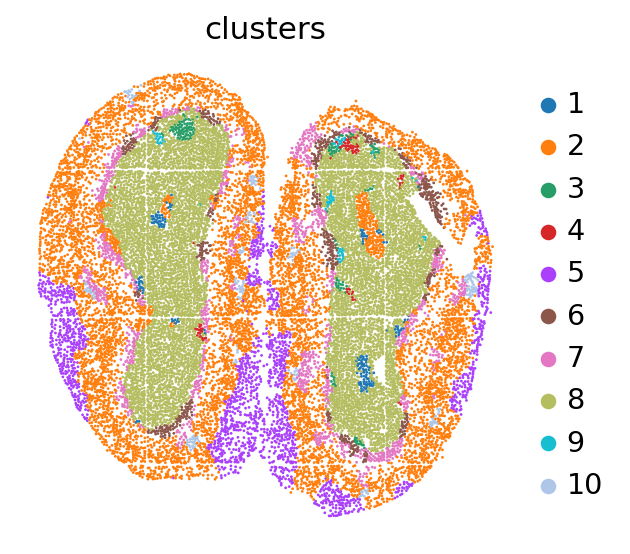

In [6]:
import matplotlib as mpl
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import visual_high
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
warnings.filterwarnings('ignore')
file_path = '/home/cuiyaxuan/spatialLIBD/5.Mouse_Olfactory/' #please replace 'file_path' with the download path
adata = sc.read_h5ad(file_path + 'filtered_feature_bc_matrix.h5ad') #### project name
df_label=pd.read_csv('./label.csv', index_col=0) 
visual_high.visual(adata,df_label)